# Rossmann Sales Analysis - Project 1

### By team 11: Jaganath Sairam and William Senay

## Agenda

* Cleansing
* Getting an Overall Sense of the Data
    * Observe Sales Over Time
        * Check for Seasonality
    * Day of the Week
        * Check for Unexpected Results
* Check for Relationships
    * Storetype: Customer Count / Sales
    * Storetype: Daily Promotions
    * Competition Distance: Continuous Promotions
    * Continuous Promotions: Average Customers / Spending
* Conclusions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import math

## Data Cleansing

In [2]:
df_train = pd.read_csv('Data/train.csv')
df_store = pd.read_csv('Data/store.csv')

C:\Users\wills\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Datasets found on Kaggle at https://www.kaggle.com/c/rossmann-store-sales

In [5]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [6]:
df_train['Date'] = df_train['Date'].apply(lambda dt: dt.replace(day=1))

We changed the reorganized the dates by month instead of day, so that we can better observe seasonality.

In [57]:
df = pd.merge(df_train, df_store, on='Store')
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

The datatypes all look correct.

In [58]:
df.count()

Store                        1017209
DayOfWeek                    1017209
Date                         1017209
Sales                        1017209
Customers                    1017209
Open                         1017209
Promo                        1017209
StateHoliday                 1017209
SchoolHoliday                1017209
StoreType                    1017209
Assortment                   1017209
CompetitionDistance          1014567
CompetitionOpenSinceMonth     693861
CompetitionOpenSinceYear      693861
Promo2                       1017209
Promo2SinceWeek               509178
Promo2SinceYear               509178
PromoInterval                 509178
dtype: int64

There are no missing rows. The columns that have less than 1017209 are correct given their descriptions.

In [59]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2014-12-01,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2014-12-01,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,4,2013-12-01,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,3,2013-12-01,0,0,0,0,c,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-04-01,0,0,0,0,b,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


This concludes the cleaning section. We now have an analysis ready dataset.

## Initial Exploration

In [60]:
date_sales = df.groupby('Date').sum()
date_sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Date,,,,,,,,,,,,,
2013-01-01,19286282,134913,180132207,20380423,28869,11150,5115,186317720.0,170427.0,47384495.0,17701,417663.0,35610227.0
2013-02-01,17420760,124880,171534275,19244468,26683,11150,2676,168287000.0,153944.0,42800716.0,15988,377244.0,32164076.0
2013-03-01,19287270,144950,201180369,21969462,27892,16725,5689,186317750.0,170438.0,47386507.0,17701,417663.0,35610227.0
2013-04-01,18665100,128225,183431432,20882365,27880,13380,5319,180307500.0,164940.0,45857910.0,17130,404190.0,34461510.0
2013-05-01,19287270,138260,185411063,20723886,26202,14495,3774,186317750.0,170438.0,47386507.0,17701,417663.0,35610227.0


Text(0,0.5,'Sales (100 M)')

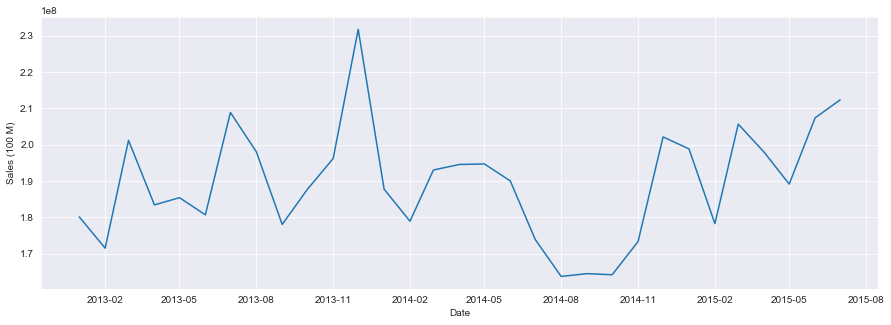

In [130]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=date_sales.index, y=date_sales['Sales'])
ax.set_ylabel('Sales (100 M)')

* Sales did not increase or decrease over time from early 2013 to late 2015
* There is seasonality--sales increase in December and then drop back down in the following months
* High fluctuation--if sales are up a month or two, they usually drop the following month or two, and vice versa

In [62]:
df_open = df.set_index('Open').loc[1,:].reset_index()

In [63]:
DoW1 = df.set_index('DayOfWeek').loc[1]
DoW1_list = DoW1['Sales']
DoW2 = df.set_index('DayOfWeek').loc[2]
DoW2_list = DoW2['Sales']
DoW3 = df.set_index('DayOfWeek').loc[3]
DoW3_list = DoW3['Sales']
DoW4 = df.set_index('DayOfWeek').loc[4]
DoW4_list = DoW4['Sales']
DoW5 = df.set_index('DayOfWeek').loc[5]
DoW5_list = DoW5['Sales']
DoW6 = df.set_index('DayOfWeek').loc[6]
DoW6_list = DoW6['Sales']
DoW7 = df.set_index('DayOfWeek').loc[7]
DoW7_list = DoW7['Sales']
DoW7_open = df_open.set_index('DayOfWeek').loc[7]
DoW7_open_list = DoW7_open['Sales']

Text(0.5,0,'Sunday (Only When Open)\nSales')

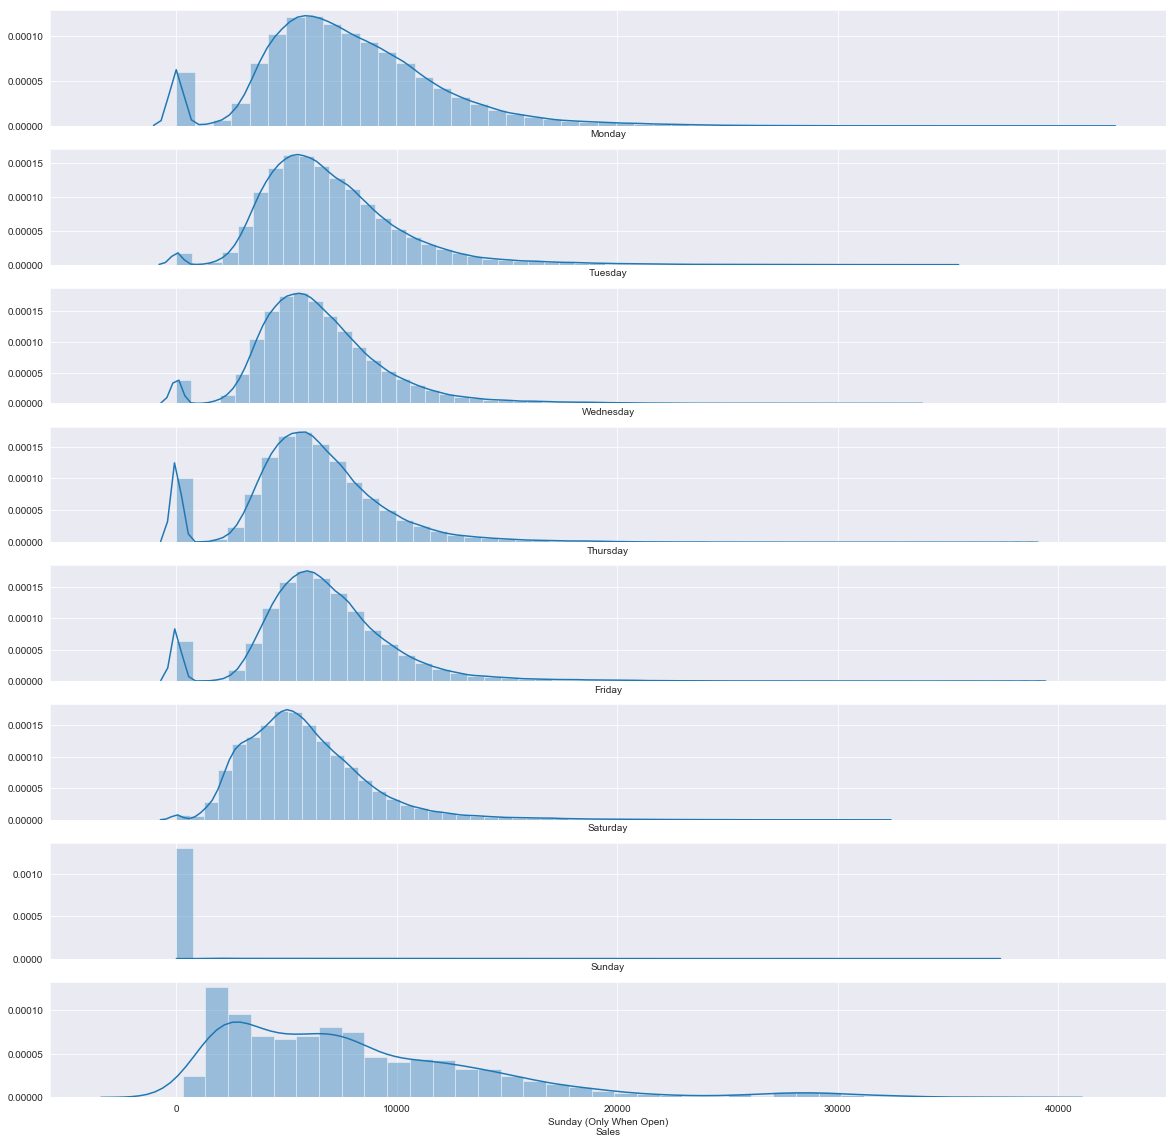

In [135]:
fig, ax = plt.subplots(8,1, figsize=(20,20), sharex=True)
sns.distplot(DoW1_list, ax=ax[0])
ax[0].set_xlabel('Monday')
sns.distplot(DoW2_list, ax=ax[1])
ax[1].set_xlabel('Tuesday')
sns.distplot(DoW3_list, ax=ax[2])
ax[2].set_xlabel('Wednesday')
sns.distplot(DoW4_list, ax=ax[3])
ax[3].set_xlabel('Thursday')
sns.distplot(DoW5_list, ax=ax[4])
ax[4].set_xlabel('Friday')
sns.distplot(DoW6_list, ax=ax[5])
ax[5].set_xlabel('Saturday')
sns.distplot(DoW7_list, ax=ax[6])
ax[6].set_xlabel('Sunday')
sns.distplot(DoW7_open_list, ax=ax[7])
ax[7].set_xlabel('Sunday (Only When Open)\nSales')

* Day of the week does not seem to be much of a factor on sales during the week
* Saturdays are rarely ever closed and Sundays are almost always closed
* On the Sundays when the stores are open, sales are spread out more evenly, and have a much les normal distribution than the rest of the days

## Exploring Relationships

In [65]:
# find average customers by store type
storetype_customers = df_open.groupby('StoreType')['Customers'].mean()
df_avg_customers = pd.DataFrame(storetype_customers)
df_avg_customers

,Customers
StoreType,
a,795.361469
b,2021.822335
c,815.465887
d,606.339876


In [66]:
# find average sales by store type
storetype_sales = df_open.groupby('StoreType')['Sales'].mean()
df_avg_sales = pd.DataFrame(storetype_sales)
df_avg_sales

,Sales
StoreType,
a,6925.167661
b,10231.407505
c,6932.512755
d,6822.141881


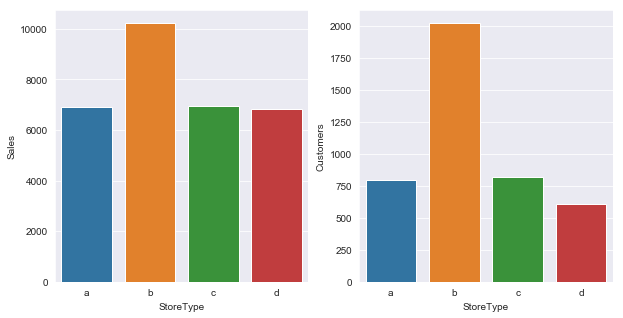

In [137]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x=df_avg_sales.index, y=df_avg_sales['Sales'], ax=ax[0])
sns.barplot(x=df_avg_customers.index, y=df_avg_customers['Customers'], ax=ax[1])

* Store type B clearly brings in the most customers and makes the most sales 
* While B brings in signigicantly more customers, it does not bring in more sales to the same degree
* Could it be that promotions have a greater impact on store type B?

In [68]:
df_promos = df_open.set_index('Promo').loc[1,:].reset_index()
df_no_promos = df_open.set_index('Promo').loc[0,:].reset_index()

In [69]:
promos_avgs = df_promos.groupby('StoreType').mean()
no_promos_avgs = df_no_promos.groupby('StoreType').mean()

Text(4,1,'Note:\nOpaque: No promotions\nTranslucent: With Promotions')

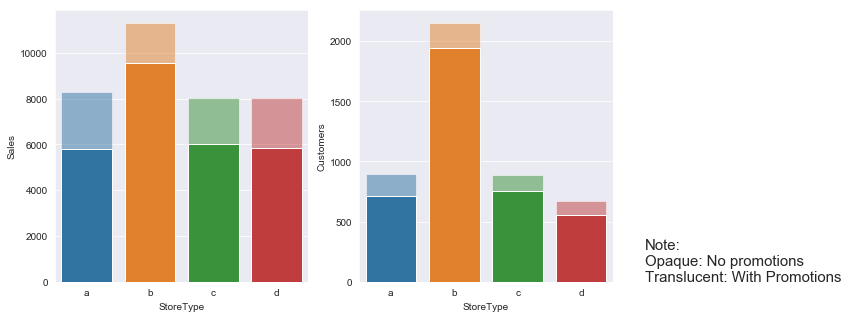

In [149]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

# Sales plot
sns.barplot(x=promos_avgs.index, y=promos_avgs['Sales'], alpha = .5, ax=ax[0])
sns.barplot(x=no_promos_avgs.index, y=no_promos_avgs['Sales'], ax=ax[0])

# Customers plot
sns.barplot(x=promos_avgs.index, y=promos_avgs['Customers'], alpha = .5, ax=ax[1])
sns.barplot(x=no_promos_avgs.index, y=no_promos_avgs['Customers'], ax=ax[1])

plt.text(4,1,'Note:\nOpaque: No promotions\nTranslucent: With Promotions', size=15)

* Promotions seem to have an equal effect on sales across all store types
* Promotions seem to affect store type B slightly more than the rest, but not enough to cause the substantial difference in sales and customers

In [116]:
StoreWithPromo=df_store.loc[df_store['Promo2'] == 1]
StoreWithNoPromo=df_store.loc[df_store['Promo2'] == 0]

In [122]:
PromoAvgCompDistance = StoreWithPromo['CompetitionDistance'].mean()

In [123]:
NoPromoAvgCompDistance = StoreWithNoPromo['CompetitionDistance'].mean()

In [124]:
PromoByAverageCompetitionDistance = pd.DataFrame({
    'Promo2': [0,1],
    'Average Competition Distance': [NoPromoAvgCompDistance, PromoAvgCompDistance]
})

In [125]:
PromoByAverageCompetitionDistance

,Promo2,Average Competition Distance
0,0,6549.520295
1,1,4316.508772


Text(0,0.5,'Average Competition Distance (m)')

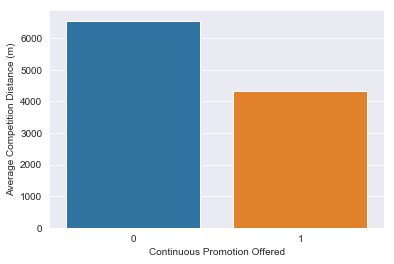

In [127]:
ax = sns.barplot(x=PromoByAverageCompetitionDistance.index, y=PromoByAverageCompetitionDistance['Average Competition Distance'])
ax.set_xlabel('Continuous Promotion Offered')
ax.set_ylabel('Average Competition Distance (m)')

* Continous Promotions are being offered when the competition distance is closer
* This shows that stores start offering continuous promotions as a way to convince customers to buy from them instead of competition
* How effective is this?

In [8]:
StoreSalesWithPromo=df.loc[df['Promo2'] == 1]

In [9]:
StoreSalesWithOutPromo=df.loc[df['Promo2'] == 0]

In [10]:
PromoStoresGroupBy = StoreSalesWithPromo.groupby(['Date'], sort = True)

In [11]:
NoPromoStoresGroupBy = StoreSalesWithOutPromo.groupby(['Date'], sort = True)

In [12]:
PromoStoresAvgCustomerSpending = pd.DataFrame ({
    "TotalStores" : PromoStoresGroupBy.Store.nunique(), 
    "TotalSales" : PromoStoresGroupBy.Sales.sum(), 
    "TotalCustomerCount" : PromoStoresGroupBy.Customers.sum(), 
    "AvgCustomerCountPerStore" : (PromoStoresGroupBy.Customers.sum()/PromoStoresGroupBy.Store.nunique()).astype(int), 
    "AverageCustomerSpending" : PromoStoresGroupBy.Sales.sum()/PromoStoresGroupBy.Customers.sum() 
})

In [13]:
NoPromoStoresAvgCustomerSpending = pd.DataFrame ({
    "TotalStores" : NoPromoStoresGroupBy.Store.nunique(), 
    "TotalSales" : NoPromoStoresGroupBy.Sales.sum(), 
    "TotalCustomerCount" : NoPromoStoresGroupBy.Customers.sum(), 
    "AvgCustomerCountPerStore" : (NoPromoStoresGroupBy.Customers.sum()/NoPromoStoresGroupBy.Store.nunique()).astype(int), 
    "AverageCustomerSpending" : NoPromoStoresGroupBy.Sales.sum()/NoPromoStoresGroupBy.Customers.sum() 
})

In [14]:
PromoStoresAvgCustomerSpending.head()

,TotalStores,TotalSales,TotalCustomerCount,AvgCustomerCountPerStore,AverageCustomerSpending
Date,,,,,
2013-01-01,571,86358696,9311452,16307,9.274461
2013-02-01,571,82083067,8775098,15367,9.354091
2013-03-01,571,96951584,10091187,17672,9.607550
2013-04-01,571,87921426,9521860,16675,9.233640
2013-05-01,571,88230017,9360034,16392,9.426250


In [15]:
NoPromoStoresAvgCustomerSpending.head()

,TotalStores,TotalSales,TotalCustomerCount,AvgCustomerCountPerStore,AverageCustomerSpending
Date,,,,,
2013-01-01,544,93773511,11068971,20347,8.471746
2013-02-01,544,89451208,10469370,19245,8.544087
2013-03-01,544,104228785,11878275,21835,8.774741
2013-04-01,544,95510006,11360505,20883,8.407197
2013-05-01,544,97181046,11363852,20889,8.551770


Text(0,0.5,'\nAverage Customer Count per Store')

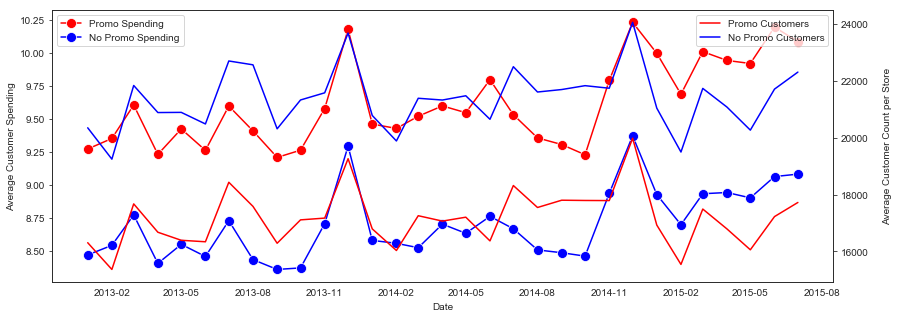

In [166]:
fig, ax = plt.subplots(figsize=(14,5))
sns.set_style('white')
# sales
sns.lineplot(x=PromoStoresAvgCustomerSpending.index, y=PromoStoresAvgCustomerSpending['AverageCustomerSpending'], 
             label='Promo Spending', color='red', marker='o', markersize=10)
sns.lineplot(x=NoPromoStoresAvgCustomerSpending.index, y=NoPromoStoresAvgCustomerSpending['AverageCustomerSpending'], 
             label='No Promo Spending', color='blue', marker='o', markersize=10)
# right y axis
ax2 = ax.twinx()
# customers
sns.lineplot(x=PromoStoresAvgCustomerSpending.index, y=PromoStoresAvgCustomerSpending['AvgCustomerCountPerStore'],
             label='Promo Customers', ax=ax2, color='red')
sns.lineplot(x=NoPromoStoresAvgCustomerSpending.index, y=NoPromoStoresAvgCustomerSpending['AvgCustomerCountPerStore'], 
             label='No Promo Customers', ax=ax2, color='blue')
# add legend
ax.legend()
ax.set_ylabel('Average Customer Spending')
ax2.set_ylabel('\nAverage Customer Count per Store')

* Stores with promotions tend to have fewer customers than stores without promotions. This is likely the result of customers choosing to buy from competition, which is closer to those stores with continuous promotions.
* While stores with promotions have fewer customers, those customers are spending more money than at stores without continuous promotions.

## Conclusions